# Distribuciones Estadísticas

Metodos Computacionales 1

Diego Useche Reyes

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('default')
plt.style.use('dark_background')

**Distribución discreta uniforme:**

La función densidad probabilidad para una distribución uniforme está dada por:

$$
f(x) = \begin{cases} \frac{1}{N} \quad \text{si} \quad x = 1, 2, ... , N \\ 0 \quad \text{en otro caso} \end{cases}
$$

**Distribución continua uniforme:**

La función densidad probabilidad para una distribución continua uniforme en el intervalo $[a, b]$ está dada por:

$$
f(x) = \begin{cases} \frac{1}{b-a} \quad \text{si} \quad a \leq x \leq b \\ 0 \quad \text{en otro caso} \end{cases}
$$

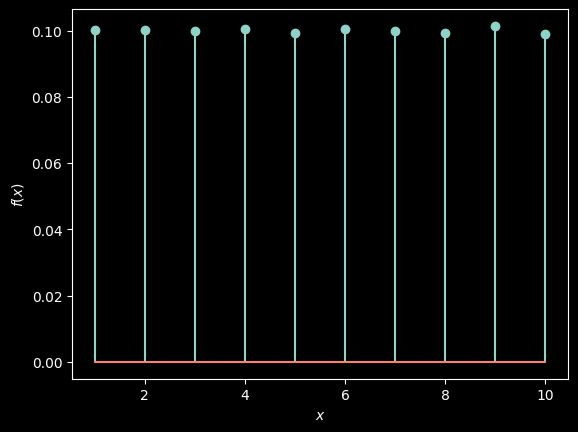

In [29]:
num_points = 100000
x = np.arange(1, 11)
y = np.zeros(10)
uni_dist = np.random.randint(1, 11, num_points)
for value in uni_dist:
    y[value - 1] += 1
y /= num_points

plt.stem(x, y, use_line_collection = True)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.show()

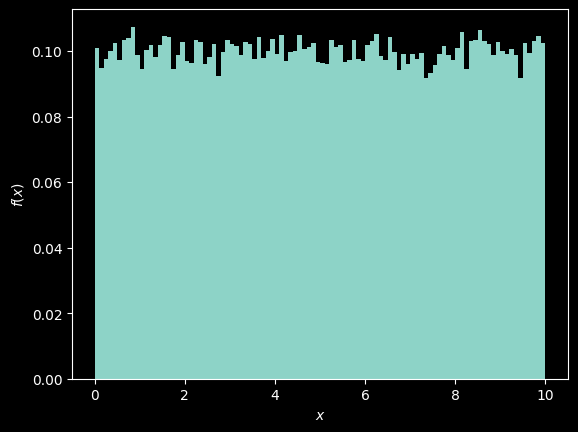

In [37]:
# Distribucion continua
num_points = 100000

y = np.random.rand(num_points)*10

plt.hist(y, bins = 100, density = True)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.show()

**Distribución binomial:**

Una variable aleatoria $X$ tiene una distribución binomial de parámetros $n$ y $p$, si su función de densidad está dada por:

$$
f(x) = \begin{cases} {n \choose x}p^x(1-p)^{n-x} \quad \text{si} \quad x = 1, 2, ... , N \\ 0 \quad \text{en otro caso} \end{cases}
$$

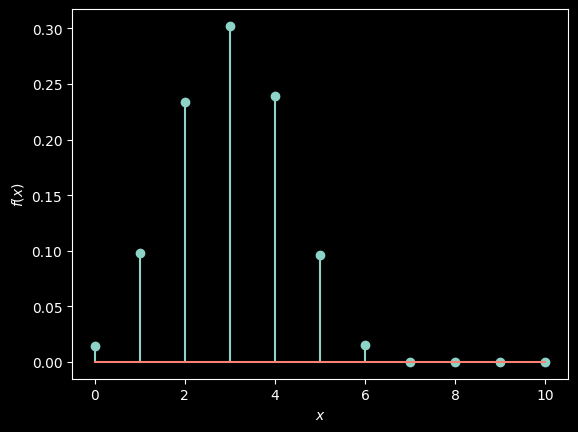

In [43]:
num_points = 10000
x = np.arange(0, 11)
y = np.zeros(11)
n = 6
p = 0.5
uni_dist = np.random.binomial(n, p, num_points)
for value in uni_dist:
    y[value] += 1
y /= num_points

plt.stem(x, y, use_line_collection = True)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.show()

**Distribución de Poisson:**

Una variable aleatoria $X$ tiene una distribución de Poisson de parametro $\lambda > 0$, si su función de densidad está dada por:

$$
f(x) = \begin{cases} e^{-\lambda}\frac{\lambda^x}{x!} \quad \text{si} \quad x = 0, 1, 2, ... , N \\ 0 \quad \text{en otro caso} \end{cases}
$$

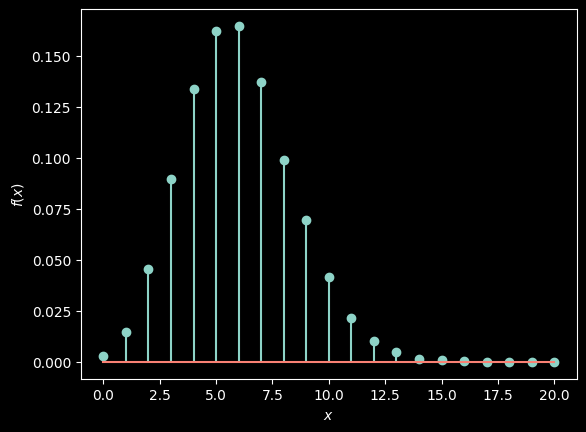

In [48]:
num_points = 10000
x = np.arange(0, 21)
y = np.zeros(21)
lambda_poisson = 6
uni_dist = np.random.poisson(lambda_poisson, num_points)
for value in uni_dist:
    y[value] += 1
y /= num_points

plt.stem(x, y, use_line_collection = True)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.show()

**Ejemplo:**

Los accidentes de tránsito son eventos con poca probabilidad, por lo tanto pueden ser descritos mediante una distribución de Poisson. Si un 3 % de los accidentes de tránsito en cierta carretera son fatales. Calcule la probabilidad de que 4 de 200 accidentes ocurridos, en promedio, en un año, en esta carretera sean fatales. Compare este resultado con el que se puede obtener usando el modelo $P(k, \lambda) = e^{-\lambda}\frac{\lambda^k}{k!}$, donde $k$ es el número de veces que ocurre el evento y $\lambda$ la cantidad de veces que se espera ocurra el evento.

In [58]:
dist_poisson = np.random.poisson(6, 10000)
num_fours = 0
for value in dist_poisson:
    if value == 4:
        num_fours += 1
        
num_fours = num_fours / len(dist_poisson)
print(num_fours)

0.1323


In [55]:
np.exp(-6)*6**4/(np.math.factorial(4))

0.13385261753998337

**Distribución normal**

Una variable aleatoria $X$ tiene una distribución normal de parametros $\mu$ y $\sigma$, si su función de densidad está dado por:

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp{\Big[-\frac{(x-\mu)^2}{2\sigma^2}\Big]}
$$




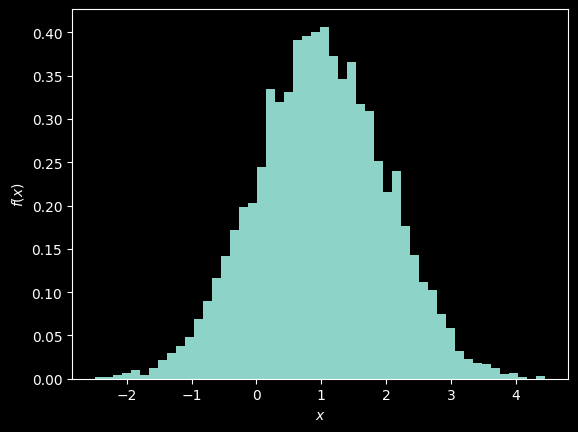

In [63]:
mu, sigma = 1, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)
plt.hist(s, 50, density = True)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.show()

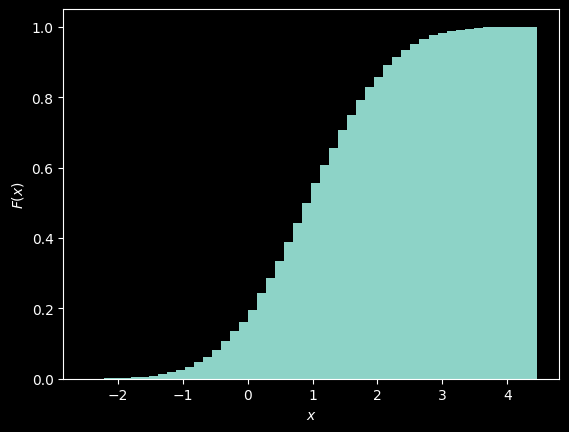

In [64]:
## Cumulative distribution
plt.hist(s, 50, density = True, cumulative = True)
plt.ylabel("$F(x)$")
plt.xlabel("$x$")
plt.show()

**Teorema del limite central:**

La media aritmética o suma de variables (i.i.d) aleatorias independientes y igualmente distribuidas es aproximadamente una distribución normal.

**Ejemplo:** Lanzamiento de una moneda, 0 o 1

1. Lance 100 veces una moneda cuya cara tiene un valor de 0 (cero) y cuyo sello tiene un valor de 1
(uno).
2. Sume la cantidad de ceros y unos en esos 100 lanzamientos.
3. Guarde el resultado de esa suma.
4. Repita los 100 lanzamientos 200 veces de modo que al final tenga 200 sumas diferentes.
5. Imprima en la terminal el valor promedio de los 200 resultados obtenidos.

50.46 4.725293641669267


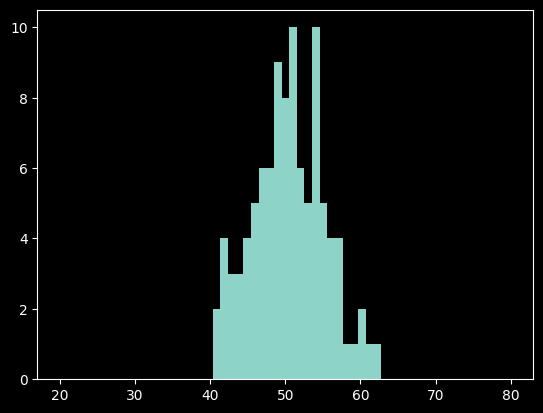

In [11]:
def rolling():
    lanzamientos = []
    for i in range(100):
        rand_num = np.random.randint(0,2)
        lanzamientos.append(rand_num)

    zeros, ones = 100 - sum(lanzamientos), sum(lanzamientos)
    
    return zeros, ones


def n_rollings(n_rollings):
    rollings = np.zeros(n_rollings)
    for i in range(len(rollings)):
        rollings[i] = rolling()[1]
    return rollings

rollings = n_rollings(100)

plt.hist(rollings, np.linspace(20, 80, 60))

print(rollings.mean(), rollings.std())

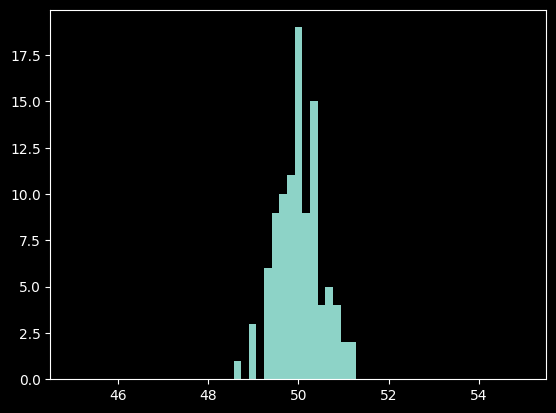

50.01949999999999 0.4953329688199646


In [10]:
def n_rollings(n_rollings, n_means):
    rollings_means = np.zeros(n_means)
    for j in range(n_means):
        rollings = np.zeros(n_rollings)
        for i in range(len(rollings)):
            rollings[i] = rolling()[1]
        rollings_means[j] = rollings.mean()
    return rollings_means

rollings_means = n_rollings(100, 100)

plt.hist(rollings_means, np.linspace(45, 55, 60))
plt.show()

print(rollings_means.mean(), rollings_means.std())